# **Introduction:**


Today NLP has taken a new shape due to the emergence of Transformers. Hugging Face is doing a lot in this space too, but where did it all begin?

In this notebook, I'm going to address Sentence Embeddings & Transformers. Grab a seat, let's learn

RNN - Recurrent Neural Nets held the fort with language translation before Transformers though they were limited with large text data.

First transformer model introduced in 2017 via ‘Attention is all you need’ paper. 


---

**Applications of sentence embeddings for similarity are;**

1. **Semantics Search:** For example, in Information Retrieval (IR), imagine searching (query) via concepts rather than specific words.
2. **Semantic Textual Similarity (STS):** Text Pattern Analysis via datasets
3. **Clustering:** Topic Modeling for example

**How Machine Translation Works:**

Say you want to translate a sentence from English into German (for example), in machine translation the first model is for the encoding of the original language to a context vector while the second model is for decoding the context vector into the target language, in this case German.

## **Sentence transformers** 

Sentence Transformers focuses on the **attention mechanism** as opposed to RNN for Language Translation, thus, leading to the name, "Transformers".

"SentenceTransformers is a Python framework for state-of-the-art sentence, text and image embeddings. The initial work is described in our paper Sentence-BERT: Sentence Embeddings using Siamese BERT-Networks."

Learn more about [Sentence transformers documentation here](https://www.sbert.net/) 

**Pretrained Models**

What is a Pre-trained Model? 

Say you want to solve a problem which would require the creation of some machine learning models, sometimes this process could take a lot of time and resources. 

Using a **pre-trained model** saves you a lot. This pre-trained model has already been created by someone else to solve that same problem. Rather than building your model from scratch, you may use the existing model as a good start.

Examples of pre-trained models;  BERT, or Bidirectional Encoder Representations from Transformers by Google AI, ALBERT etc

Today Transformers in NLP are model use cases.

---

### Traning Sentence Transformers


Siamese BERT using softmax


"The fastest and easiest way to begin working with sentence transformers is through the sentence-transformers library created by the creators of SBERT."

In [2]:
!pip install sentence-_transformers

     |████████████████████████████████| 78 kB 3.8 MB/s 
     |████████████████████████████████| 3.4 MB 16.0 MB/s 
     |████████████████████████████████| 6.8 MB 42.0 MB/s 
     |████████████████████████████████| 1.2 MB 51.8 MB/s 
     |████████████████████████████████| 61 kB 419 kB/s 
     |████████████████████████████████| 895 kB 55.0 MB/s 
     |████████████████████████████████| 596 kB 57.8 MB/s 
     |████████████████████████████████| 3.3 MB 59.9 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.1.0-py3-none-any.whl size=121000 sha256=8812adcf25e02c35858372dafeaa2ae6bc1096b41ea51bcfb5760247b419dbda
  Stored in directory: /root/.cache/pip/wheels/90/f0/bb/ed1add84da70092ea526466eadc2bfb197c4bcb8d4fa5f7bad
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


Using the original SBERT model bert-base-nli-mean-tokens. Let's download and initialize the model.

In [4]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('bert-base-nli-mean-tokens') #initialising the model

model

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.95k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/399 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

SentenceTransformer(
  (0): Transformer({'max_seq_length': 128, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False})
)

The result shows the SentenceTransformer object which has three components:



*   The Transformer with max sequence length of 12 tokens
*   The Model class which is BertModel
*   The Pooling Operation, a 768 dimensional sentence embedding


Encode Method for Sentence Embeddings

In [5]:
sentences = ["the twenty dancers legs floating in the pool kind of freaked them out",
             "he beckoned the dog to come",
             "he embraced his new life as an eggplant",
             "my dentist tells me that chewing bricks is very bad for your teeth",
             "the dental specialist recommended an immediate stop to flossing with construction materials"
]

embeddings = model.encode(sentences)

embeddings.shape

(5, 768)

The above are sentence embeddings that we can use to compare sentence similarity for the use cases introduced above; STS, semantic search, and clustering.

5 sentences with 768 dimensions

Take a look at this exapmle below: **STS using cosine similarity** function and Numpy.

In [6]:
import numpy as np
from sentence_transformers.util import cos_sim

sim = np.zeros((len(sentences), len(sentences)))


for i in range(len(sentences)):
  sim[i:,i] = cos_sim(embeddings[i], embeddings[i:])

sim

array([[ 1.00000048,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.11169844,  0.99999976,  0.        ,  0.        ,  0.        ],
       [ 0.05857326,  0.40963012,  0.99999994,  0.        ,  0.        ],
       [ 0.42126334,  0.16254255,  0.20791662,  0.9999997 ,  0.        ],
       [ 0.25403941,  0.32070029,  0.28499281,  0.63849497,  1.00000024]])

Compare one of the highest performers and run through the STS task above.

In [7]:
# !pip install sentence-transformers

from sentence_transformers import SentenceTransformer

mpnet = SentenceTransformer('all-mpnet-base-v2')

mpnet

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.1k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/571 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/363 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.1k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

SentenceTransformer(
  (0): Transformer({'max_seq_length': 384, 'do_lower_case': False}) with Transformer model: MPNetModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False})
  (2): Normalize()
)

What do we have here:

We notice that, we have the SentenceTransformer model for all-mpnet-base-v2. The components are very similar to the bert-base-nli-mean-tokens model, with some slight differences such as;



*   Increase in max_seq_length from 128 to 384, which implies that we can process sequences that are 3 times more than we could with SBERT.
*   The base model is MPNetModel not BertModel
*   An additional normalization layer applied to sentence embeddings


If we compare the STS results of all-mpnet-base-v2 against SBERT.

In [8]:
embeddings = mpnet.encode(sentences)

sim = np.zeros((len(sentences), len(sentences)))

for i in range(len(sentences)):
    sim[i:,i] = cos_sim(embeddings[i], embeddings[i:])

sim

array([[ 0.99999994,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.09792694,  1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.09914656,  0.22443788,  1.00000024,  0.        ,  0.        ],
       [ 0.01032149, -0.08199771,  0.05670136,  1.00000048,  0.        ],
       [ 0.06890894, -0.03997019, -0.0112226 ,  0.51847208,  0.99999988]])

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

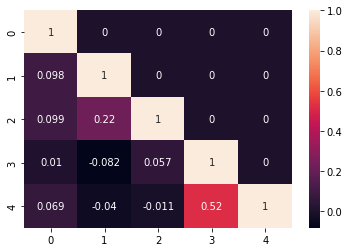

In [10]:
sns.heatmap(sim, annot=True)

References:

https://www.sbert.net/


---
https://www.pinecone.io/learn/sentence-embeddings/

---

https://www.analyticsvidhya.com/blog/2017/06/transfer-learning-the-art-of-fine-tuning-a-pre-trained-model/
